# Project M1 - Cell Type Classification using Neural Network
### The objective of this project is to classify two cell types (spiny/aspiny) according to their electrophysiology features using both logistic regression and neural network.
#### The data set is downloaded from the __[Allen Institute data base](http://alleninstitute.github.io/AllenSDK/_static/examples/nb/cell_types.html#Computing-Electrophysiology-Features)__ and is already saved in the file "ElecPhyFeatures.csv".
#### Two examples for classifying Iris data set using logistic regression and neural network are given in notebooks "logistic-regression-for-iris-classification.ipynb" and "Iris_NeuralNetworkTutorial.ipynb" respectively. You can start with these two examples before you work on the Allen's data set.

## Getting start with the Allen's data set
Use python library Pandas to read the csv file. The data set is now stored in Pandas dataframe.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("ElecPhyFeatures.csv",index_col=0)
df

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,dendrite_type
0,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391,spiny
1,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595,spiny
2,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321,aspiny
3,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559,aspiny
4,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991,spiny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,0.001963,9.182407,-1.750000,1.013889e+00,1.030300,12.216160,1.024077,-58.781250,-56.218753,-62.375003,...,1.255667,-58.937500,-56.322920,-78.666672,1.477299,1.234940,1.447535,-88.937508,-78.321983,aspiny
2329,0.064670,102.640000,25.802499,1.585265e-01,1.273960,2.804420,1.025750,-49.187504,-49.062500,-50.593752,...,1.979330,-61.281254,-59.187500,-74.328125,3.919119,4.053287,4.134621,-96.250008,-74.360977,spiny
2330,0.239796,27.853333,-2.267500,7.307692e-02,1.095120,2.426287,1.025020,-51.531250,-50.437501,-52.481252,...,1.633196,-51.593750,-50.510418,-70.618750,2.646425,2.688956,2.838209,-95.000008,-70.443848,sparsely spiny
2331,0.066685,119.322857,-15.087501,1.131737e-01,1.318820,3.928953,1.024840,-52.406250,-54.854169,-52.268752,...,1.888704,-52.406250,-54.937503,-75.993753,3.560123,3.500551,3.714190,-98.593758,-79.264778,spiny


Find the features with no missing data. You will choose any combination of features you want (avoid using those 'features' that are actually IDs) as input to the classifier. You will get bonus points if you figure out which features are most useful in distinguishing the cell type.

In [2]:
idx_no_nan = np.nonzero([~np.isnan(df[features].values).any() for features in df.columns[:-1]])[0]
# features that have no missing data which you can choose from
df.columns[idx_no_nan]

Index(['f_i_curve_slope', 'fast_trough_t_long_square',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_short_square', 'has_burst', 'has_delay', 'has_pause',
       'id', 'input_resistance_mohm', 'latency', 'peak_t_long_square',
       'peak_t_short_square', 'peak_v_long_square', 'peak_v_short_square',
       'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 'seal_gohm',
       'specimen_id', 'tau', 'threshold_i_long_square',
       'threshold_i_short_square', 'threshold_t_long_square',
       'threshold_t_short_square', 'threshold_v_long_square',
       'threshold_v_short_square', 'thumbnail_sweep_id',
       'trough_t_long_square', 'trough_t_short_square', 'trough_v_long_square',
       'trough_v_short_square', 'upstroke_downstroke_ratio_long_square',
       'upstroke_downstroke_ratio_short_square', 'vm_for_sag', 'vrest'],
      dtype='object')

The cell type is determined by the dendrite type in the last column of the data set. There is a minority type called "sparsely spiny". You can do either a 3-class classification or a binary classification excluding the "sparsely spiny".

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

sel_feature = ['f_i_curve_slope','vrest'] # Select features
X = df[sel_feature].values
Y = df['dendrite_type'].values
y = np.where(Y=='spiny',1,0)
y[np.nonzero(Y=='sparsely spiny')[0]] = 2

Plot classes based on the two features selected. As you can see, the classes are more seperable under the feature "f_i_curve_slope" rather then "Vrest".

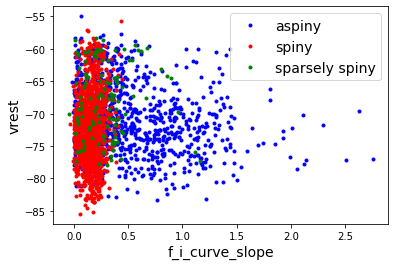

In [4]:
plt.figure(1, figsize=(6,4))
plt.plot(X[:,0][y==0], X[:, 1][y==0], "b.", label="aspiny")
plt.plot(X[:,0][y==1], X[:, 1][y==1], "r.", label="spiny")
plt.plot(X[:,0][y==2], X[:, 1][y==2], "g.", label="sparsely spiny")
plt.xlabel(sel_feature[0], fontsize=14)
plt.ylabel(sel_feature[1], fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.show()

### Now you have defined the training data set and the class labels. Next train the logistic regression classifier and the neural network like in the two examples and compare the performance of these two methods.

In [6]:
#Next train the logistic regression classifier and 
#the neural network like in the two examples and 
#compare the performance of these two methods.

import numpy
import pandas
import matplotlib.pyplot as plt
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier
#from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
%matplotlib inline

#Always do logistic regression first for a classification problem 
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

#define variables used for the training and testing 
X_train, X_test, y_train, y_test = train_test_split(X,y)
lr = LogisticRegression()
model1 = lr.fit(X_train,y_train)
predict1 = lr.predict(X_test)

nn = MLPClassifier()
model2 = nn.fit(X_train, y_train)
predict2 = nn.predict(X_test)


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predict1))
print(accuracy_score(y_test,predict2))


#run cross validation
#from sklearn.model_selection import cross_validate

#cross_validate(nn,X,Y)
#cross_validate(lr,X,Y)


0.75
0.7465753424657534
